<a href="https://colab.research.google.com/github/jay0x5/About-Me-Website/blob/main/LSTMPRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
# import tensorflow as tf
# tf.keras.utils.set_random_seed(1)
# tf.config.experimental.enable_op_determinism()

crypto_currency  = 'TATAMOTOR'
against_currency = 'INR'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()


In [ ]:
data = pd.read_csv("/content/TATAMOTORS.NS.csv")

#Scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["High"].values.reshape(-1,1))

prediction_days = 60

x_train,y_train = [],[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Model
model = Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of the next closing

model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train,y_train,epochs=25, batch_size=32)

Epoch 1/25
42/42 [==============================] - 19s 323ms/step - loss: 0.0232
Epoch 2/25
42/42 [==============================] - 14s 331ms/step - loss: 0.0056
Epoch 3/25
42/42 [==============================] - 14s 328ms/step - loss: 0.0054
Epoch 4/25
42/42 [==============================] - 15s 353ms/step - loss: 0.0050
Epoch 5/25
42/42 [==============================] - 13s 317ms/step - loss: 0.0045
Epoch 6/25
42/42 [==============================] - 13s 320ms/step - loss: 0.0043
Epoch 7/25
42/42 [==============================] - 15s 350ms/step - loss: 0.0040
Epoch 8/25
42/42 [==============================] - 15s 359ms/step - loss: 0.0039
Epoch 9/25
42/42 [==============================] - 14s 325ms/step - loss: 0.0036
Epoch 10/25
42/42 [==============================] - 13s 315ms/step - loss: 0.0033
Epoch 11/25
42/42 [==============================] - 13s 316ms/step - loss: 0.0041
Epoch 12/25
42/42 [==============================] - 15s 369ms/step - loss: 0.0032
Epoch 13/25
4

22/22 [==============================] - 4s 144ms/step


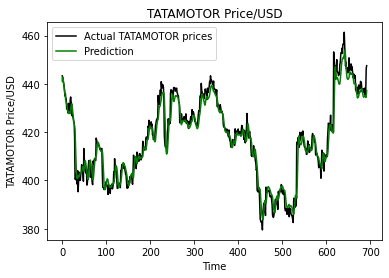

In [ ]:
#tesing the model

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = pd.read_csv("/content/TATAMOTORS.NSTest.csv")
actual_prices = test_data['High'].values

total_dataset = pd.concat([data['High'], test_data['High']],axis=0)

model_inputs = total_dataset[len(total_dataset)- len(test_data) -prediction_days:].values 
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


#Plot
plt.plot(actual_prices, color="black",label=f"Actual {crypto_currency} prices")
plt.plot(prediction_prices,color="green",label="Prediction")
plt.title(f"{crypto_currency} Price/USD")
plt.xlabel('Time')
plt.ylabel(f'{crypto_currency} Price/USD')
plt.legend()
plt.show()

In [ ]:
#Predict next day
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs)+1 , 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Predicted Price for Tomorrow: {prediction}")

prediction = np.round_(prediction, decimals=2)

print(f"Rounded: {prediction}")

1/1 [==============================] - 1s 1s/step
Predicted Price for Tomorrow: [[441.09198]]
Rounded: [[441.09]]


In [ ]:
#447.06